In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import glob

In [2]:
def data_input(era: str) -> pd.DataFrame:
    stats = pd.DataFrame(columns=['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
                                   '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
                                   'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'])
    path = "./player_stats/{}/*.csv".format(era)
    for file in glob.glob(path):
        df = pd.read_csv(file)
        stats = stats.append(df.iloc[1:], ignore_index=True)
        indices = stats.query('MP < 10 or G < 10').index
        stats.drop(indices, inplace=True)
    return stats


## Modern Era

In [3]:
stats_modern = data_input("modern")

In [4]:
stats_modern.isna().sum()

Rk          0
Player      0
Pos         0
Age         0
Tm          0
G           0
GS          0
MP          0
FG          0
FGA         0
FG%         0
3P          0
3PA         0
3P%       336
2P          0
2PA         0
2P%         0
eFG%        0
FT          0
FTA         0
FT%        12
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
dtype: int64

In [5]:
def feature_engineering(stats: pd.DataFrame) -> pd.DataFrame:
    stats = stats.fillna(0)
    stats['PTS/36'] = round(stats['PTS'] * (36 / stats['MP']), 2)
    stats['3P/36'] = round(stats['3P'] * (36 / stats['MP']), 2)
    stats['3PA/36'] = round(stats['3PA'] * (36 / stats['MP']), 2)
    stats['2P/36'] = round(stats['2P'] * (36 / stats['MP']), 2)
    stats['2PA/36'] = round(stats['2PA'] * (36 / stats['MP']), 2)
    stats['FG/36'] = round(stats['FG'] * (36 / stats['MP']), 2)
    stats['FGA/36'] = round(stats['FGA'] * (36 / stats['MP']), 2)
    stats['FT/36'] = round(stats['FT'] * (36 / stats['MP']), 2)
    stats['FTA/36'] = round(stats['FTA'] * (36 / stats['MP']), 2)
    stats['DRB/36'] = round(stats['DRB'] * (36 / stats['MP']), 2)
    stats['ORB/36'] = round(stats['ORB'] * (36 / stats['MP']), 2)
    stats['TRB/36'] = round(stats['TRB'] * (36 / stats['MP']), 2)
    stats['AST/36'] = round(stats['AST'] * (36 / stats['MP']), 2)
    stats['STL/36'] = round(stats['STL'] * (36 / stats['MP']), 2)
    stats['BLK/36'] = round(stats['BLK'] * (36 / stats['MP']), 2)
    stats['PF/36'] = round(stats['PF'] * (36 / stats['MP']), 2)
    stats['TOV/36'] = round(stats['TOV'] * (36 / stats['MP']), 2)
    stats['AST/TOV'] = round(stats['AST/36'] / stats['TOV/36'], 2)
    stats['EFF'] = round(stats['PTS/36'] + stats['AST/36'] + stats['TRB/36'] + stats['STL/36'] + stats['BLK/36'] -
                         stats['TOV/36'] - (stats['FGA/36'] - stats['FG/36']), 2) 
    #https://www.nbastuffer.com/analytics101/nba-efficiency/

    stats['Pos'] = stats['Pos'].apply(lambda x : "F" if x=="PF-SF" or x=="SF-PF" or x=="SF-C" or x=="SF-SG" 
                                      or x=="SG-PF" or x=="SF" or x=="PF"
                                      else ("C" if x=="C-PF" or x=="PF-C"
                                      else ("G" if x=="PG" or x=="PG-SG" or x=="SG" or x=="SG-PG" or x=="SG-SF" else x)))
    return stats

In [6]:
stats_modern = feature_engineering(stats_modern)

In [7]:
X_modern = stats_modern.drop(columns=['Rk', 'Player', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
                    '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 
                     'STL', 'BLK', 'TOV', 'PF', 'PTS'])
y_modern = stats_modern['Pos']
X_train_modern, X_test_modern, y_train_modern, y_test_modern = train_test_split(X_modern, y_modern, test_size=0.3, random_state=101)

In [8]:
plt.rcParams['font.size'] = '16'

In [9]:
def plot_histograms(X_train: pd.DataFrame):
    fig, axes = plt.subplots(6, 4, figsize=(20, 30), sharey=True)
    plt.setp(plt.gcf().get_axes(), yticks=[])
    sns.histplot(ax=axes[0,0], data=X_train, x="FG/36", hue="Pos", element="poly")
    sns.histplot(ax=axes[0,1], data=X_train, x="FGA/36", hue="Pos", element="poly")
    sns.histplot(ax=axes[0,2], data=X_train, x="FG%", hue="Pos", element="poly")
    sns.histplot(ax=axes[0,3], data=X_train, x="eFG%", hue="Pos", element="poly")
    sns.histplot(ax=axes[1,0], data=X_train, x="2P/36", hue="Pos", element="poly")
    sns.histplot(ax=axes[1,1], data=X_train, x="2PA/36", hue="Pos", element="poly")
    sns.histplot(ax=axes[1,2], data=X_train, x="2P%", hue="Pos", element="poly")
    sns.histplot(ax=axes[1,3], data=X_train, x="PTS/36", hue="Pos", element="poly")
    sns.histplot(ax=axes[2,0], data=X_train, x="3P/36", hue="Pos", element="poly")
    sns.histplot(ax=axes[2,1], data=X_train, x="3PA/36", hue="Pos", element="poly")
    sns.histplot(ax=axes[2,2], data=X_train, x="3P%", hue="Pos", element="poly")
    sns.histplot(ax=axes[2,3], data=X_train, x="EFF", hue="Pos", element="poly")
    sns.histplot(ax=axes[3,0], data=X_train, x="FT/36", hue="Pos", element="poly")
    sns.histplot(ax=axes[3,1], data=X_train, x="FTA/36", hue="Pos", element="poly")
    sns.histplot(ax=axes[3,2], data=X_train, x="FT%", hue="Pos", element="poly")
    sns.histplot(ax=axes[3,3], data=X_train, x="PF/36", hue="Pos", element="poly")
    sns.histplot(ax=axes[4,0], data=X_train, x="DRB/36", hue="Pos", element="poly")
    sns.histplot(ax=axes[4,1], data=X_train, x="ORB/36", hue="Pos", element="poly")
    sns.histplot(ax=axes[4,2], data=X_train, x="TRB/36", hue="Pos", element="poly")
    sns.histplot(ax=axes[4,3], data=X_train, x="BLK/36", hue="Pos", element="poly")
    sns.histplot(ax=axes[5,0], data=X_train, x="STL/36", hue="Pos", element="poly")
    sns.histplot(ax=axes[5,1], data=X_train, x="AST/36", hue="Pos", element="poly")
    sns.histplot(ax=axes[5,2], data=X_train, x="TOV/36", hue="Pos", element="poly")
    sns.histplot(ax=axes[5,3], data=X_train, x="AST/TOV", hue="Pos", element="poly")

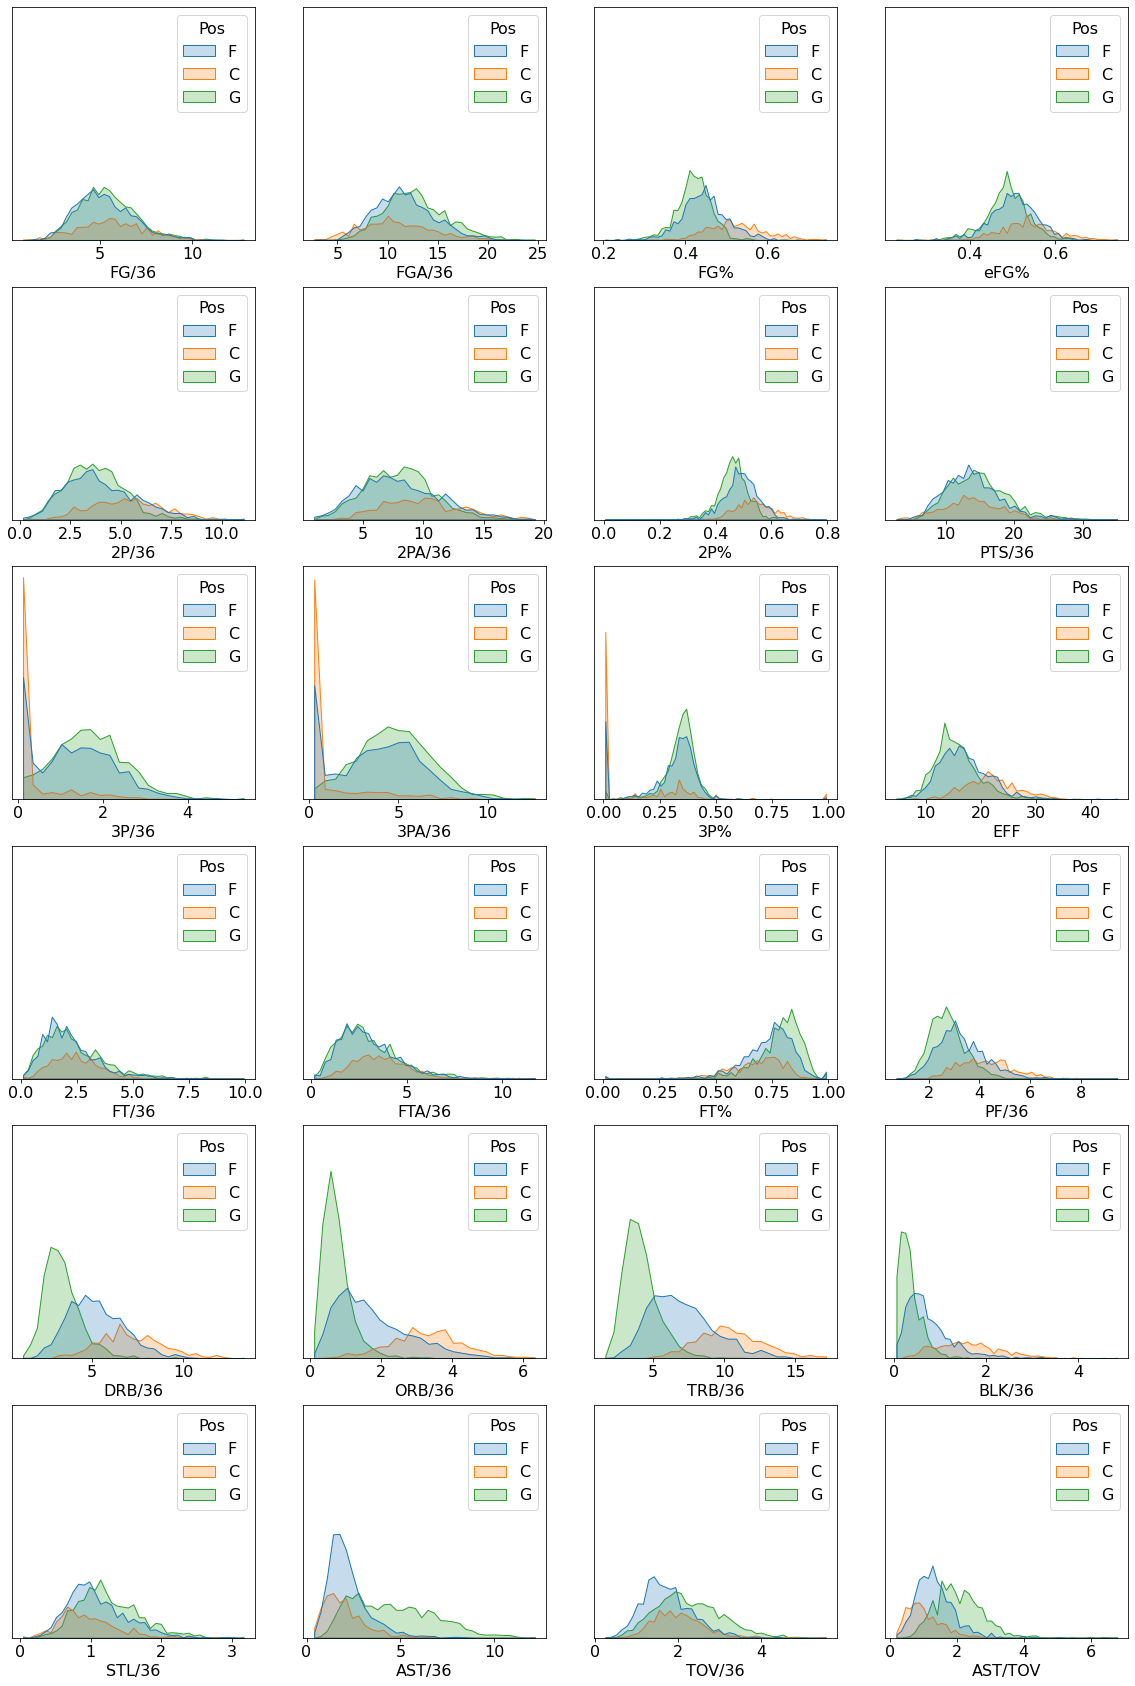

In [10]:
plot_histograms(X_train_modern)

In [11]:
le = preprocessing.LabelEncoder()
le.fit(list(set(stats_modern.Pos.values)))

y_train_modern = le.transform(y_train_modern)
y_test_modern = le.transform(y_test_modern)

In [12]:
features_to_drop = ['FG/36', 'FGA/36', 'eFG%', '2P/36', '2PA/36', '2P%', 'PTS/36', 'FT/36', 'FTA/36', 'FT%', 'STL/36', 'Pos'] 
X_train_modern = X_train_modern.drop(columns=features_to_drop, axis=1)
X_test_modern = X_test_modern.drop(columns=features_to_drop, axis=1)

In [13]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train_modern)
X_train_modern = scaler.transform(X_train_modern) 
X_test_modern = scaler.transform(X_test_modern)

In [14]:
accuracy = []
accuracy.append('Modern Players')

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_modern, y_train_modern)
accuracy.append(round(knn.score(X_test_modern, y_test_modern), 2))

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_modern, y_train_modern)
accuracy.append(round(lda.score(X_test_modern, y_test_modern), 2))

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train_modern, y_train_modern)
accuracy.append(round(logreg.score(X_test_modern, y_test_modern), 2))

In [18]:
results = pd.DataFrame(columns = ['Era', 'KNN Classifier', 'Linear Discriminant Analysis', 'Logistic Regression'])
results.loc[0] = accuracy

In [19]:
results

,Era,KNN Classifier,Linear Discriminant Analysis,Logistic Regression
0,Modern Players,0.8,0.8,0.82


## Old Era

In [20]:
stats_old = data_input("old")

In [21]:
stats_old.isna().sum()

Rk          0
Player      0
Pos         0
Age         0
Tm          0
G           0
GS        555
MP          0
FG          0
FGA         0
FG%         0
3P          0
3PA         0
3P%       394
2P          0
2PA         0
2P%         0
eFG%        0
FT          0
FTA         0
FT%         0
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
dtype: int64

In [22]:
stats_old = feature_engineering(stats_old)

In [23]:
X_old = stats_old.drop(columns=['Rk', 'Player', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
                    '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 
                     'STL', 'BLK', 'TOV', 'PF', 'PTS'])
y_old = stats_old['Pos']
X_train_old, X_test_old, y_train_old, y_test_old = train_test_split(X_old, y_old, test_size=0.3, random_state=101)

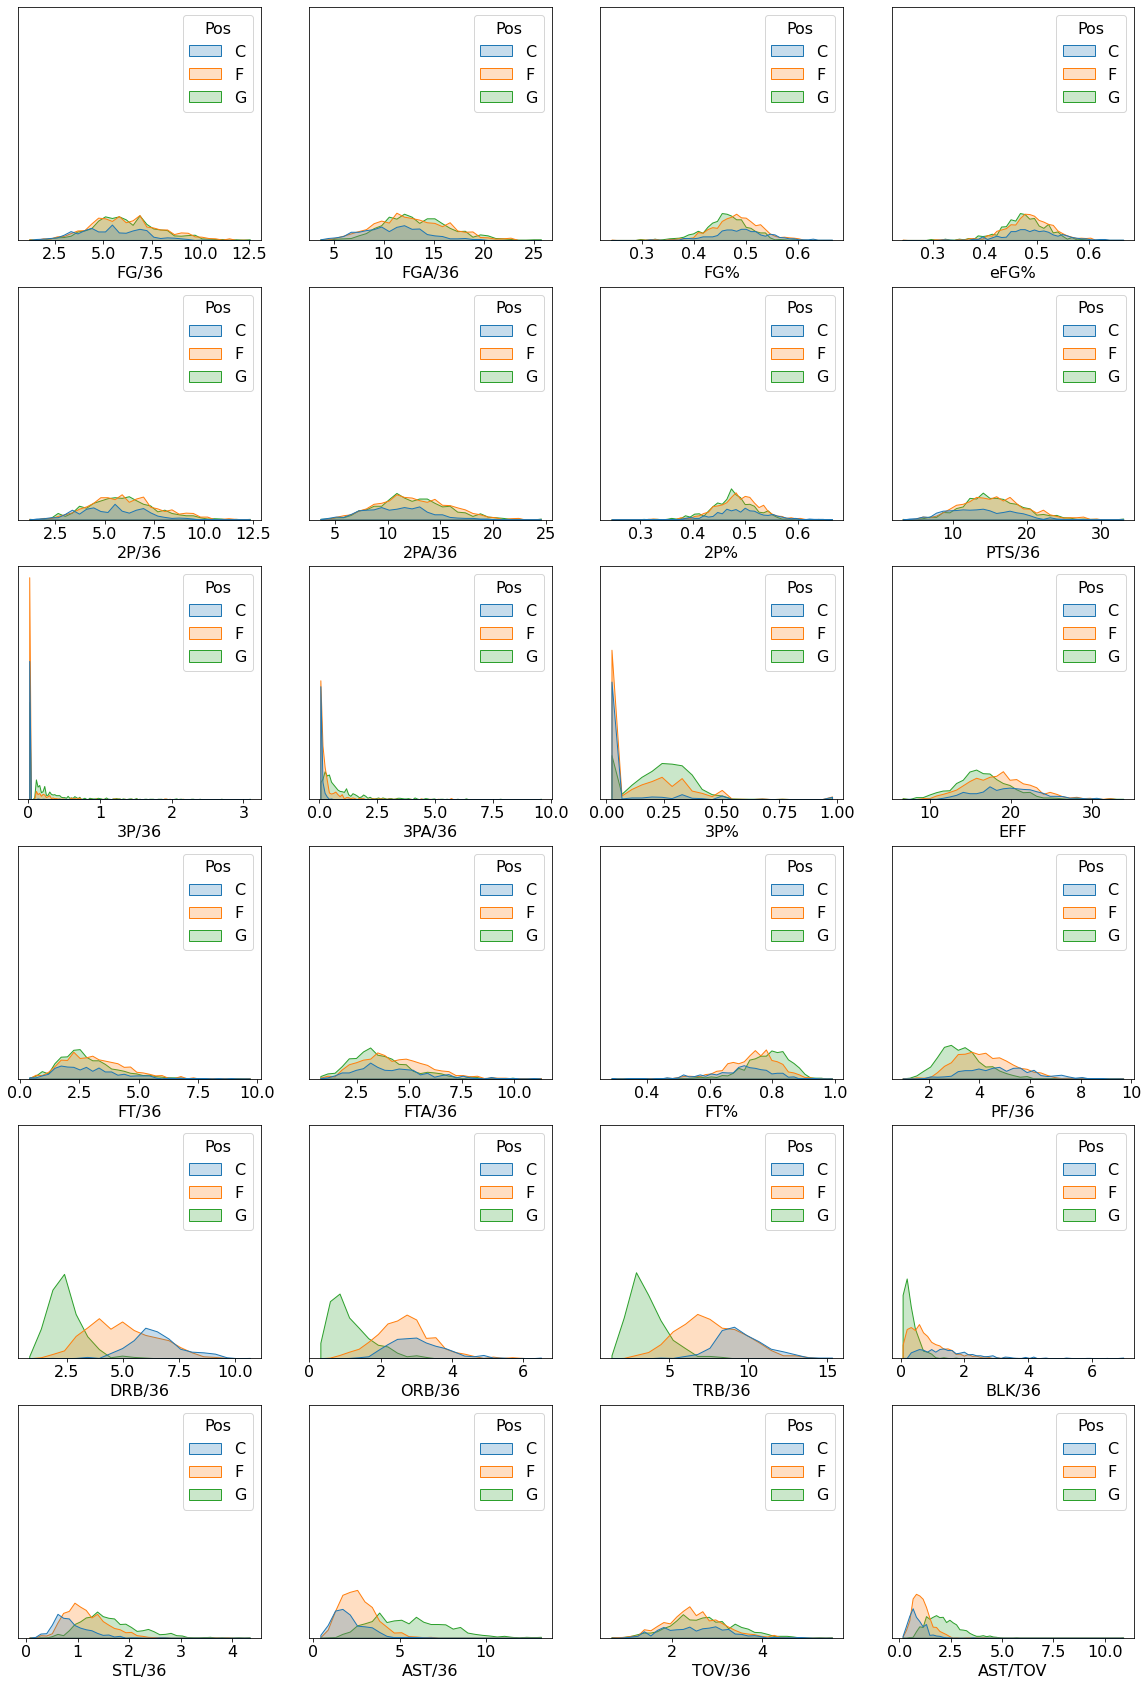

In [24]:
plot_histograms(X_train_old)

In [25]:
y_train_old = le.transform(y_train_old)
y_test_old = le.transform(y_test_old)

In [26]:
features_to_drop = ['FG/36', 'FGA/36', 'eFG%', '2P/36', '2PA/36', '2P%', 'PTS/36', 'FT/36', 'FTA/36', 'TOV/36', 'FG%', 'Pos'] 
X_train_old = X_train_old.drop(columns=features_to_drop, axis=1)
X_test_old = X_test_old.drop(columns=features_to_drop, axis=1)

In [27]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train_old)
X_train_old = scaler.transform(X_train_old) 
X_test_old = scaler.transform(X_test_old)

In [28]:
accuracy = []
accuracy.append('Old Players')

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_old, y_train_old)
accuracy.append(round(knn.score(X_test_old, y_test_old), 2))

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_old, y_train_old)
accuracy.append(round(lda.score(X_test_old, y_test_old), 2))

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train_old, y_train_old)
accuracy.append(round(logreg.score(X_test_old, y_test_old), 2))
results.loc[1] = accuracy

In [32]:
results

,Era,KNN Classifier,Linear Discriminant Analysis,Logistic Regression
0,Modern Players,0.80,0.8,0.82
1,Old Players,0.83,0.8,0.80
